## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
len(df['Mouse ID'].value_counts())
#249 Mouse ID
len(df['Drug Regimen'].value_counts())
#10 Drug Regimen

df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
grouped = df.groupby(['Drug Regimen'])

mean = grouped['Tumor Volume (mm3)'].mean().to_frame(name='mean').reset_index()
median = grouped['Tumor Volume (mm3)'].median().to_frame(name='median').reset_index()
var = grouped['Tumor Volume (mm3)'].var().to_frame(name='var').reset_index()
std = grouped['Tumor Volume (mm3)'].std().to_frame(name='std').reset_index()
sem = grouped['Tumor Volume (mm3)'].sem().to_frame(name='sem').reset_index()

#merge all the dataframe
mean_median = pd.merge(mean, median, on='Drug Regimen')
var_std = pd.merge(var, std, on='Drug Regimen')
var_std_sem = pd.merge(var_std, sem, on='Drug Regimen')
summary = pd.merge(mean_median, var_std_sem, on='Drug Regimen')
summary = summary.set_index('Drug Regimen')
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

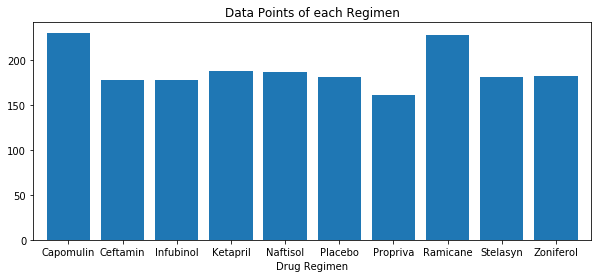

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count=grouped.count()['Mouse ID']
count.plot(kind='bar', figsize=(10, 4), title='Data Points of each Regimen',rot=0, width=0.8)

In [4]:
count=pd.DataFrame(count).reset_index()
count

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


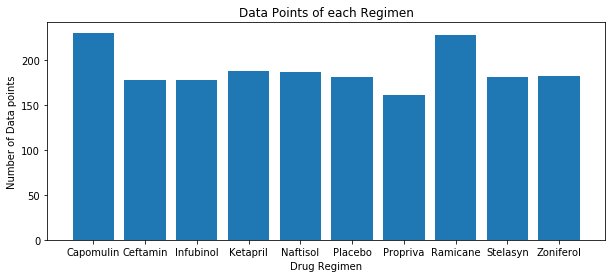

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,4))
plt.bar(x=count['Drug Regimen'], height=count['Mouse ID'],  width=0.8)
plt.title("Data Points of each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data points")
plt.show()

## Pie plots

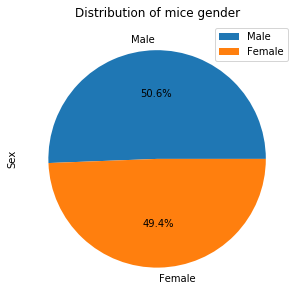

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=df['Sex'].value_counts()
gender=pd.DataFrame(gender)
gender

pie_plot= gender.plot.pie(y='Sex', figsize=(5, 5), autopct='%1.1f%%',title='Distribution of mice gender')

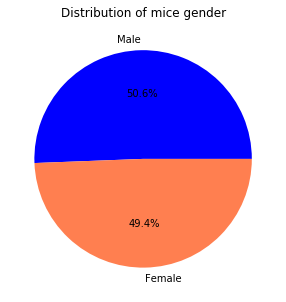

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Male', 'Female']
colors=['blue', 'coral']

plt.figure(figsize=(5, 5))
plt.pie(gender['Sex'], labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of mice gender")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [52]:
regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

def get_regimen_tumor_size(x):
    return df.loc[df['Drug Regimen'] == x].sort_values(['Timepoint'],ascending=False).groupby('Mouse ID').head(1)

In [57]:
#Calculate the lower/upper bound and IQR
def get_regimen_bound(tumor_size):
    x = tumor_size.describe()
    mean=x.iloc[1,0]
    lowrq=x.iloc[4,0]
    upperq=x.iloc[6,0]
    iqr=upperq-lowrq
    lower_bound=lowrq - (1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    return (mean, lowrq, upperq, lower_bound, upper_bound)

data = [(x,) + get_regimen_bound(get_regimen_tumor_size(x)[['Tumor Volume (mm3)']]) for x in regimens]
res = pd.DataFrame(data, columns =['regimen','mean','lowrq','upperq','lower_bound','upper_bound']) 
res = res.set_index('regimen')
res

,mean,lowrq,upperq,lower_bound,upper_bound
regimen,,,,,
Capomulin,36.667568,32.377357,40.159220,20.704562,51.832015
Ramicane,36.191390,31.560470,40.659006,17.912664,54.306811
Infubinol,58.178246,54.048608,65.525743,36.832905,82.741446
Ceftamin,57.753977,48.722078,64.299830,25.355450,87.666458


In [65]:
#Plot and find out outlier
tumor_sizes = [get_regimen_tumor_size(x)['Tumor Volume (mm3)'] for x in regimens]

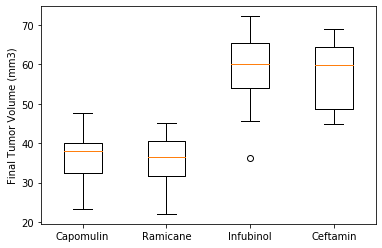

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_sizes,labels=regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [64]:
for x in regimens:
    tumor_size = get_regimen_tumor_size(x)['Tumor Volume (mm3)']
    _, _, _, lower_bound, upper_bound = get_regimen_bound(get_regimen_tumor_size(x)[['Tumor Volume (mm3)']]) 
    print(tumor_size.loc[(tumor_size < lower_bound) | (tumor_size > upper_bound)])

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and scatter plots

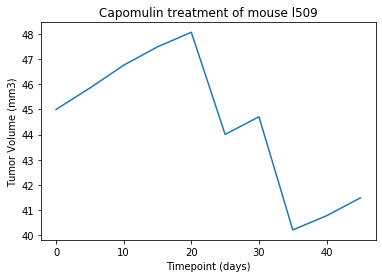

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = df.loc[df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin.loc[capomulin['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

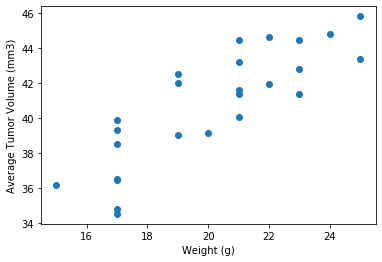

In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = df.loc[df['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
str_plot = plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [71]:
corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation of mouse weight and the average tumor volume by using Capomulin is {corr}")

The correlation of mouse weight and the average tumor volume by using Capomulin is 0.84
